In [7]:
import numpy as np
from matplotlib import pyplot as plt
from blueqat import opt
Opt = opt.Opt
import optuna
import time
import numpy as np

In [8]:
import pandas as pd
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import gym
import os
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)
env = gym.make("MountainCar-v0")

In [9]:
qstr = "{}*(1 - (q0 + q1 + q2))^2"

# なんか色々定義

In [10]:
qstr = "{}*(1 - (q0 + q1 + q2))^2"

In [11]:
def get_matrix(position, velocity, a=5, b=1e-2, c=1):
    # 中心を0に近づけ、負の値を正にする
    e_p = abs(position + 0.5)**2

    matrix = [-1*(e_p+a*abs(velocity + b * -1)), -1*(e_p+a *
                                                     abs(velocity + b * 0)), -1*(e_p+a*abs(velocity + b * 1))]
    return matrix

In [12]:
qaoa_action_dic = {(1, 0, 0): 0, (0, 1, 0): 1,
                   (0, 0, 1): 2, (1, 0): 0, (0, 1): 2}


def get_action(action_qaoa):
    return qaoa_action_dic[action_qaoa]


def get_qaoa(p, v, a, b, c):
    return Opt().add(np.diag(get_matrix(p, v, a, b))).add(qstr.format(c))


def get_max_position(obs):
    return max([(i[0] + 0.5)**2 for i in obs])

In [13]:
b = 5e-2
c = 100
get_matrix(p, v, a, b)

NameError: name 'p' is not defined

In [14]:
problem = get_qaoa(p, v, a, b, c)

NameError: name 'p' is not defined

In [15]:
problem.qaoa().most_common()

NameError: name 'problem' is not defined

In [12]:
problem.run()

[0, 1, 0]

In [13]:
problem.qubo

array([[-133.64163314,  200.        ,  200.        ],
       [   0.        , -116.36845314,  200.        ],
       [   0.        ,    0.        , -166.36845314]])

# optunaしてみる

In [19]:
a = [1e1, 1e2, 1e3]
b = np.linspace(1e-2, 1e-1, 10)
c = [1e1, 1e2, 1e3]

In [20]:
params = [a, b, c]

In [51]:
# 50回回して評価


def objective(trial):
    a = trial.suggest_loguniform("a", 1e1, 1e3)
    b = trial.suggest_uniform("b", 1e-2, 1e-1)
    c = trial.suggest_loguniform("c", 1e1, 1e2)

    observation = env.reset()
    missed_count = 0
    obs = []

    for i in range(50):
        p, v = observation

        problem = get_qaoa(p, v, a, b, c)

        action_qaoa = problem.qaoa().most_common()[0][0]
        while sum(action_qaoa) != 1:
            missed_count += 1
            if missed_count == 50:
                return 100
            action_qaoa = tuple(problem.run())

        action = get_action(action_qaoa)

        observation, reward, done, info = env.step(action)

        obs.append(observation)

        if done == True:
            print("finissed")
            return -(51 - len(obs)) * 100

    return -100 * get_max_position(obs)

In [52]:
study = optuna.create_study()

In [53]:
start = time.time()
study.optimize(objective, n_trials=20, n_jobs=-1)
seconds = time.time() - start

[I 2019-05-31 12:05:00,597] Finished trial#5 resulted in value: -3200.0. Current best value is -3200.0 with parameters: {'a': 540.6578293922887, 'b': 0.09084138672012672, 'c': 53.3204840075409}.
[I 2019-05-31 12:05:21,501] Finished trial#1 resulted in value: -1400.0. Current best value is -3200.0 with parameters: {'a': 540.6578293922887, 'b': 0.09084138672012672, 'c': 53.3204840075409}.
[I 2019-05-31 12:05:36,142] Finished trial#11 resulted in value: -3.4481465222900445. Current best value is -3200.0 with parameters: {'a': 540.6578293922887, 'b': 0.09084138672012672, 'c': 53.3204840075409}.
[I 2019-05-31 12:05:36,634] Finished trial#9 resulted in value: 100.0. Current best value is -3200.0 with parameters: {'a': 540.6578293922887, 'b': 0.09084138672012672, 'c': 53.3204840075409}.
[I 2019-05-31 12:05:36,736] Finished trial#0 resulted in value: -3.0260434061100496. Current best value is -3200.0 with parameters: {'a': 540.6578293922887, 'b': 0.09084138672012672, 'c': 53.3204840075409}.
[I

In [36]:
actions

[2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1]

In [37]:
missed_count

22

In [38]:
len(actions)

197

In [47]:
pd.DataFrame(actions)[0].value_counts()

2    102
0     76
1     19
Name: 0, dtype: int64

# shot = 1で動かしてみる

In [21]:
observation = env.reset()

actions = []
missed_count = 0
obs = []

for i in range(200):
    p, v = observation

    problem = get_qaoa(p, v, a, b, c)

    action_qaoa = tuple(problem.run())
    while sum(action_qaoa) != 1:
        missed_count += 1
        action_qaoa = tuple(problem.run())

    action = get_action(action_qaoa)

    actions.append(action)

    observation, reward, done, info = env.step(action)
    obs.append(observation)

    if done == True:
        break

In [41]:
get_max_position(obs)

0.02881214728264116

In [24]:
pd.Series(actions).value_counts()

0    76
2    62
1    62
dtype: int64

In [54]:
seconds

80.99825501441956

In [18]:
import optuna
import time

In [56]:
study.best_params.values()

dict_values([540.6578293922887, 0.09084138672012672, 53.3204840075409])

In [57]:
a, b, c = study.best_params.values()

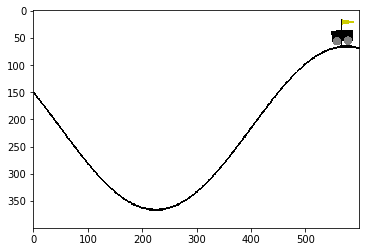

In [79]:
observation = env.reset()

fig = plt.figure()
ims = []
actions = []
missed_count = 0
obs = []

for i in range(200):
    p, v = observation

    problem = get_qaoa(p, v, a, b, c)

    action_qaoa = tuple(problem.run())
    while sum(action_qaoa) != 1:
        missed_count += 1
        action_qaoa = tuplee(problem_run())

    action = get_action(action_qaoa)

    actions.append(action)

    observation, reward, done, info = env.step(action)
    obs.append(observation)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])

    if done == True:
        break

In [80]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

In [81]:
len(obs)

114